YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


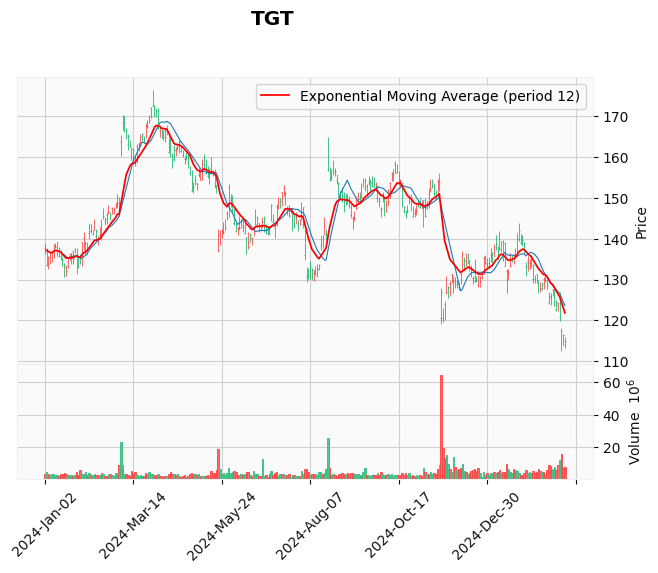

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import mplfinance as mpf

# https://github.com/matplotlib/mplfinance

def moving_averages(ticker, period, interval, start, end):

    df = yf.download(ticker, start=start, end=end, interval=interval).astype(float)
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df['ema'] = df['Open'].ewm(span=period, adjust=False, min_periods=2).mean()
    df['return'] = df['Close'] - df['Open']

    addplotdict = [mpf.make_addplot(df['ema'], color='red', label = f'Exponential Moving Average (period {period})'),
                   mpf.make_addplot(df['return'], color = 'green', label = 'Daily return')]
    
    mpf.plot(data=df, type='ohlc', style='yahoo', volume=True, title=f'{ticker}', mav=period, addplot=addplotdict[0])

ticker = "TGT"
interval = ['1h', '1d', '1wk', '1mo']

moving_averages(ticker, 12, interval[1], start = '2024-01-01', end='2025-03-07')

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,7 Day Rolling Average
Date,,,,,,
2023-01-03,141.533386,142.382236,139.527877,139.900990,3685200,144.317787
2023-01-04,142.456863,143.949345,137.755555,138.296579,4443300,144.622815
2023-01-05,143.893372,144.126571,140.190163,141.981148,3266000,144.767085
2023-01-06,149.387527,150.236377,146.337290,147.055534,4944200,145.269906
2023-01-09,145.842926,149.592763,145.833589,149.135701,3853800,146.338625
2023-01-10,145.488434,146.952919,144.434368,146.840987,2554900,147.921714
2023-01-11,148.286835,148.314818,145.423139,146.589136,3146800,148.966446
2023-01-12,149.014420,149.480818,145.964167,149.247619,3222600,149.057061
2023-01-13,153.538483,153.846293,148.436079,148.613313,5161200,149.423516


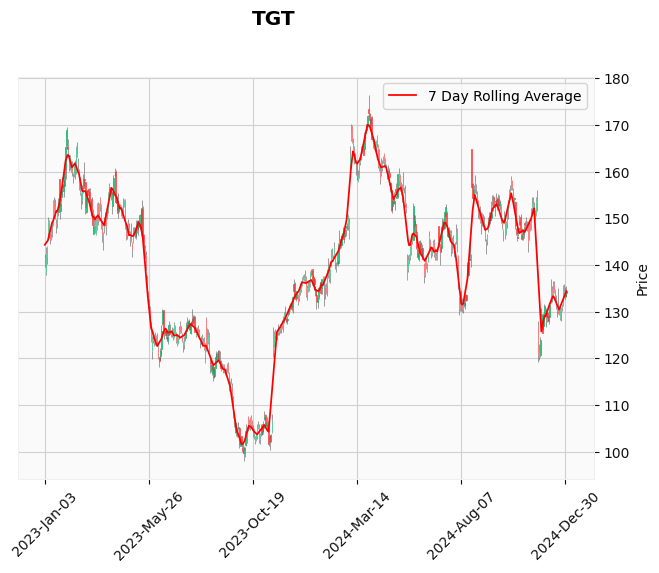

In [3]:
# Rolling window stuff
from IPython.display import display

ticker = "TGT"
interval = '1d'
stock_prices = yf.download(ticker, start='2023-01-01', end='2025-01-01', interval = interval)

stock_prices.columns = ['Close', 'High', 'Low', 'Open', 'Volume']


# Data aggregation and beta calculation

window = 7
stock_prices[f'{window} Day Rolling Average'] = stock_prices['Close'].rolling(window = window, min_periods=1, center=True).mean()

addplotdict = [mpf.make_addplot(stock_prices[f'{window} Day Rolling Average'], color = 'red', label=f'{window} Day Rolling Average')
               ]

display(stock_prices.head(10))

mpf.plot(data=stock_prices, type='candlestick', style='yahoo', title=ticker, addplot=addplotdict)

In [ ]:
# The beta coefficient gives an idea of how volatile an individual stock is as compared to the entire market
# the S&P 500 as a beta of 1.0 --> divide the covariance of the return on an indivudal stock with the return of the market
# then divide by the variance of the market as a whole --> beta = cov(r_e, r_m) / var(r_m)
# https://github.com/sammuharem/beta-calculator

import datetime
from dateutil.relativedelta import relativedelta
from itertools import cycle
import numpy as np
import statsmodels.api as sm
from IPython import display

# relativedelta is just like time and stuff its better apparently though\
# beta calc underneath this

market = '^GSPC'

ticker = 'TGT'

start = datetime.datetime.now() - relativedelta(years=5)
end = datetime.datetime.now()
interval = '1d'

df_stock = yf.download(ticker, start = start, end = end, interval = interval)


df_market = yf.download(market, start = start, end = end, interval = interval)

print(df_market.index)

df = pd.DataFrame({"Stock": [df_stock], "Market": [df_market]})

df.dropna(inplace=True)

df['Stock Return'] = df['Stock'].pct_change()

df['Market Return'] = df['Market'].pct_change()

df.dropna(inplace=True)

# linear regression calc underneath this

x = df['Market Return'] # --> independent var
y = df['Stock Return'] # --> dependent var

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

beta = model.params[1]

print(f"Beta of {ticker} vs {market}: {beta:.4f}")





[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


DatetimeIndex(['2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25',
               ...
               '2025-02-26', '2025-02-27', '2025-02-28', '2025-03-03',
               '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-07',
               '2025-03-10', '2025-03-11'],
              dtype='datetime64[ns]', name='Date', length=1256, freq=None)
                                               Stock  \
0  Price            Close        High         Low...   

                                              Market  
0  Price             Close         High          ...  


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).